In [ ]:
#An EEG processing library: https://github.com/pbashivan/EEGLearn

# from eeg_learn_functions import *

In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 84.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

import matplotlib
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu
init_notebook_mode(connected=True)

import mne
from mne.viz import plot_alignment, set_3d_view

%matplotlib inline

In [ ]:
data_path = "/content/drive/MyDrive/UMBC/RA/EEG Analysis/Data.mat"
sub10_data_path = "/content/drive/MyDrive/UMBC/RA/EEG Analysis/10 Subjects/Data_10.mat"


data = loadmat(data_path)
sub10_data = loadmat(sub10_data_path)

## Data1

About Data - Data include raw EEG data of flat hand EEG data (flatdat) and whole hand grasp EEG data (graspdat) from one subject

Both of them contains three dimensions:

	512 time samples (2 seconds), 32 EEG electrodes, 30 reptitions

EEG sampling rate: 256 Hz


In [ ]:
type(data)

dict

In [ ]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'flatdat', 'graspdat'])

### Flat Data

In [ ]:
flatdata = data['flatdat']
flatdata

array([[[  -27.20907402,  -303.26541138,    88.96969604, ...,
           118.26604462,    48.16831207,   154.12321472],
        [  -16.70697594,  -205.6678772 ,    98.95355225, ...,
            60.40171051,    74.92992401,    45.6067543 ],
        [  203.06782532, -2218.28881836,  1134.71118164, ...,
           993.31616211,   927.46087646,  -102.54963684],
        ...,
        [  378.77737427,  -909.12969971,   863.80078125, ...,
          1211.34411621,   515.86712646,  -738.21716309],
        [  290.47561646,  -709.32147217,  1292.84265137, ...,
          1164.47412109,   371.58004761,  -816.28375244],
        [  580.06481934, -1926.63378906,  1827.07043457, ...,
           141.68202209,    25.79838371,  -489.16879272]],

       [[  -23.34376717,  -293.5406189 ,    34.07686234, ...,
           149.7698822 ,    40.62418365,   180.11105347],
        [   13.43198872,  -189.90057373,   113.59958649, ...,
            46.21600723,    88.79174805,    80.26411438],
        [  389.60406494, 

In [ ]:
flatdata[:,:,0]

array([[ -27.20907402,  -16.70697594,  203.06782532, ...,  378.77737427,
         290.47561646,  580.06481934],
       [ -23.34376717,   13.43198872,  389.60406494, ...,  505.43707275,
         361.03753662,  620.58312988],
       [ -14.77845478,   72.42314148,  760.61730957, ...,  591.35986328,
         393.00610352,  496.23245239],
       ...,
       [  80.14324951,  106.82736206,  833.44921875, ...,  854.13049316,
         555.51849365,   16.48858643],
       [  95.82321167,  115.79509735,  968.36303711, ..., 1037.46765137,
         682.77258301,  176.89222717],
       [ 115.01954651,  135.65480042, 1170.97412109, ...,  984.42602539,
         650.81427002,  263.40261841]])

In [ ]:
columns = ["F4", "F42", "FC2", "C6", "C4", "C2", "CP4", "CP2", "P4", "Elec10", "Elec11", "Elect12", "Elect13", "FZ", "FCZ", "CZ", "F3", "FC3", "FC1", "C5", "C3", "C1", "CP3", "CP1", "P3", "Elec26", "Elec27", "Elec28", "Elec29", "CPZ", "PZ", "OZ"]

data_df = pd.DataFrame(flatdata[:,:,0], columns=columns)
for i in range(1,30):
  new_df = pd.DataFrame(flatdata[:,:,i], columns=columns)
  data_df = pd.concat([data_df, new_df])

In [ ]:
rep1_df = pd.DataFrame(flatdata[:,:,0], columns=columns)

In [ ]:
data_df

,F4,F42,FC2,C6,C4,C2,CP4,CP2,P4,Elec10,...,CP3,CP1,P3,Elec26,Elec27,Elec28,Elec29,CPZ,PZ,OZ
0,-27.209074,-16.706976,203.067825,343.598663,180.510208,243.425903,132.785492,216.497452,446.926270,-213.607239,...,530.657776,454.483093,194.510437,800.295532,56.469833,535.906067,623.909241,378.777374,290.475616,580.064819
1,-23.343767,13.431989,389.604065,260.290619,246.893417,311.797089,146.964859,225.858337,480.907257,-48.025425,...,683.570862,520.697388,283.513031,906.028381,66.256958,608.409607,706.377808,505.437073,361.037537,620.583130
2,-14.778455,72.423141,760.617310,366.406921,531.142883,530.432068,302.684052,333.781921,532.579712,455.775665,...,788.687134,543.587280,310.108032,938.280457,78.140633,609.110779,810.691223,591.359863,393.006104,496.232452
3,-3.640999,117.899475,1057.198608,474.760223,780.279053,698.965820,405.100586,392.191589,483.526245,894.750549,...,774.875732,520.447510,289.775421,788.632568,80.854118,492.189423,850.565674,597.819397,384.962494,331.831207
4,5.483337,127.042671,1144.858398,488.175262,819.696228,697.003174,354.453430,330.754700,366.074005,916.794250,...,727.752563,535.466125,290.291656,693.036377,76.341194,445.263763,853.050049,547.651550,380.836975,317.980804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,144.027649,67.731956,-18.706842,-98.152916,813.154663,93.839325,-659.720398,-634.949219,-1220.693481,442.762634,...,-238.852585,-453.648895,-909.689087,-360.991547,-15.931156,-209.066406,-274.667786,-797.433899,-1498.016602,-1013.074829
508,136.557846,51.041313,-60.086922,-282.244781,685.655823,0.016362,-722.778564,-735.980286,-1326.184814,241.462997,...,-288.140045,-445.145660,-858.676147,-439.524658,-22.941311,-275.227509,-289.784027,-744.753601,-1385.007812,-1170.235962
509,148.823654,55.617966,-7.335724,-358.497070,661.149658,1.012771,-647.187439,-709.958069,-1272.024536,245.641586,...,-122.316185,-222.846924,-619.145020,-345.021576,-8.719220,-202.939819,-95.979729,-436.128418,-977.526978,-1058.741211
510,170.958847,90.450226,202.025467,-155.596344,911.763977,281.959869,-310.626831,-386.462708,-890.448364,547.197388,...,186.944183,148.060867,-186.326645,-85.052452,23.628817,44.953400,237.033051,24.461311,-413.678589,-550.713562


<Axes: >

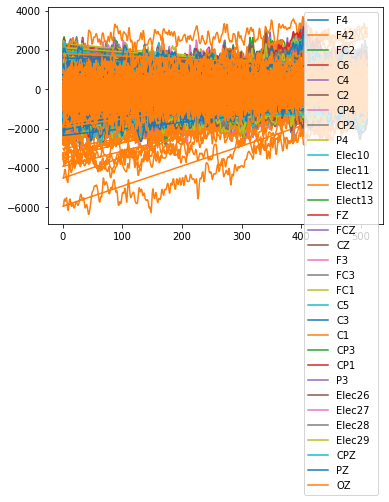

In [ ]:
data_df.plot()

In [ ]:
# Plot electrode locations on scalp
fig = plot_alignment(raw.info, trans, subject='sample', dig=False,
                     eeg=['original', 'projected'], meg=[],
                     coord_frame='head', subjects_dir=subjects_dir)

# Set viewing angle
set_3d_view(figure=fig, azimuth=135, elevation=80)

In [ ]:
from mne.datasets import sample
from mne import read_evokeds

In [ ]:
print(__doc__)

path = sample.data_path()
fname = path / 'MEG' / 'sample' / 'sample_audvis-ave.fif'

# load evoked corresponding to a specific condition
# from the fif file and subtract baseline
condition = 'Left Auditory'
evoked = read_evokeds(fname, condition=condition, baseline=(None, 0))

Automatically created module for IPython interactive environment
Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 544GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Reading /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)


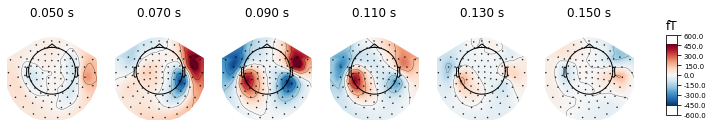

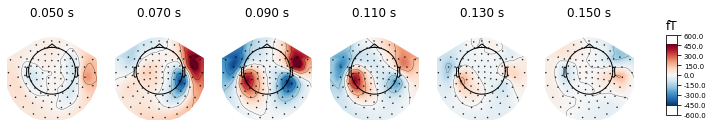

In [ ]:
times = np.arange(0.05, 0.151, 0.02)
evoked.plot_topomap(times, ch_type='mag', )

In [ ]:
evoked = read_evokeds(rep1_df, condition=condition, baseline=(None, 0))
times = np.arange(0.0, 2.0, 0.3)
evoked.plot_topomap(times)

TypeError: ignored

In [ ]:
# # Frequencies

# theta = (4,8)
# alpha = (8,12)
# beta = (12,40)

In [ ]:
# def get_fft(snippet):
#     Fs = 128.0;  # sampling rate
#     #Ts = len(snippet)/Fs/Fs; # sampling interval
#     snippet_time = len(snippet)/Fs
#     Ts = 1.0/Fs; # sampling interval
#     t = np.arange(0,snippet_time,Ts) # time vector

#     # ff = 5;   # frequency of the signal
#     # y = np.sin(2*np.pi*ff*t)
#     y = snippet
# #     print('Ts: ',Ts)
# #     print(t)
# #     print(y.shape)
#     n = len(y) # length of the signal
#     k = np.arange(n)
#     T = n/Fs
#     frq = k/T # two sides frequency range
#     frq = frq[range(n//2)] # one side frequency range

#     Y = np.fft.fft(y)/n # fft computing and normalization
#     Y = Y[range(n//2)]
#     #Added in: (To remove bias.)
#     #Y[0] = 0
#     return frq,abs(Y)
# #f,Y = get_fft(np.hanning(len(snippet))*snippet)

In [ ]:
# def theta_alpha_beta_averages(f,Y):
#     theta_range = (4,8)
#     alpha_range = (8,12)
#     beta_range = (12,40)
#     theta = Y[(f>theta_range[0]) & (f<=theta_range[1])].mean()
#     alpha = Y[(f>alpha_range[0]) & (f<=alpha_range[1])].mean()
#     beta = Y[(f>beta_range[0]) & (f<=beta_range[1])].mean()
#     return theta, alpha, beta

In [ ]:
# def make_steps(samples,frame_duration,overlap):
#     '''
#     in:
#     samples - number of samples in the session
#     frame_duration - frame duration in seconds
#     overlap - float fraction of frame to overlap in range (0,1)

#     out: list of tuple ranges
#     '''
#     #steps = np.arange(0,len(df),frame_length)
#     Fs = 128
#     i = 0
#     intervals = []
#     samples_per_frame = Fs * frame_duration
#     while i+samples_per_frame <= samples:
#         intervals.append((i,i+samples_per_frame))
#         i = i + samples_per_frame - int(samples_per_frame*overlap)
#     return intervals

In [ ]:
# def make_frames(df,frame_duration):
#     '''
#     in: dataframe or array with all channels, frame duration in seconds
#     out: array of theta, alpha, beta averages for each probe for each time step
#         shape: (n-frames,m-probes,k-brainwave bands)
#     '''
#     Fs = 128.0
#     frame_length = Fs*frame_duration
#     frames = []
#     steps = make_steps(len(df),frame_duration,overlap)
#     for i,_ in enumerate(steps):
#         frame = []
#         if i == 0:
#             continue
#         else:
#             for channel in df.columns:
#                 snippet = np.array(df.loc[steps[i][0]:steps[i][1],int(channel)])
#                 f,Y =  get_fft(snippet)
#                 theta, alpha, beta = theta_alpha_beta_averages(f,Y)
#                 frame.append([theta, alpha, beta])

#         frames.append(frame)
#     return np.array(frames)

In [ ]:
locs_2d = [(-2.0,4.0),
           (2.0,4.0),
           (-1.0,3.0),
           (1.0,3.0),
           (-3.0,3.0),
           (3.0,3.0),
           (-2.0,2.0),
           (2.0,2.0),
           (-2.0,-2.0),
           (2.0,-2.0),
           (-4.0,1.0),
           (4.0,1.0),
           (-1.0,-3.0),
           (1.0,-3.0)]

In [ ]:
# def make_data_pipeline(file_names,labels,image_size,frame_duration,overlap):
#     '''
#     IN:
#     file_names - list of strings for each input file (one for each subject)
#     labels - list of labels for each
#     image_size - int size of output images in form (x, x)
#     frame_duration - time length of each frame (seconds)
#     overlap - float fraction of frame to overlap in range (0,1)

#     OUT:
#     X: np array of frames (unshuffled)
#     y: np array of label for each frame (1 or 0)
#     '''
#     ##################################
#     ###Still need to do the overlap###!!!
#     ##################################

#     Fs = 128.0   #sampling rate
#     frame_length = Fs * frame_duration

#     print('Generating training data...')


#     for i, file in enumerate(file_names):
#         print ('Processing session: ',file, '. (',i+1,' of ',len(file_names),')')
#         data = genfromtxt(file, delimiter=',').T
#         df = pd.DataFrame(data)

#         X_0 = make_frames(df,frame_duration)
#         #steps = np.arange(0,len(df),frame_length)
#         X_1 = X_0.reshape(len(X_0),14*3)

#         images = gen_images(np.array(locs_2d),X_1, image_size, normalize=False)
#         images = np.swapaxes(images, 1, 3)
#         print(len(images), ' frames generated with label ', labels[i], '.')
#         print('\n')
#         if i == 0:
#             X = images
#             y = np.ones(len(images))*labels[0]
#         else:
#             X = np.concatenate((X,images),axis = 0)
#             y = np.concatenate((y,np.ones(len(images))*labels[i]),axis = 0)


#     return X,np.array(y)